## 2) Load the rollercoaster files

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

wood = pd.read_csv("Golden_Ticket_Award_Winners_Wood.csv") 
steel = pd.read_csv("Golden_Ticket_Award_Winners_Steel.csv")
print(wood.head())


wood["material"] = "wood" 
steel["material"] = "steel"

#Tim did this to add a new column called 'wood' and another called 'steel' to the concatenated 
#dataframe below 'all_rollercoasters'

all_rollercoasters = pd.concat([wood, steel])
#print(all_rollercoasters.head())




   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  


## 3) write function to plot rankings over time for 1 roller coaster here:

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


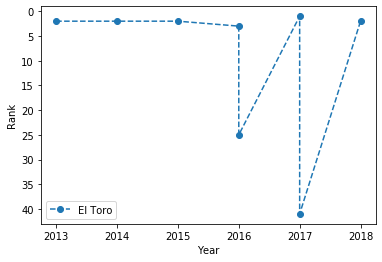

<Figure size 432x288 with 0 Axes>

In [3]:
def plotrankings(coaster, df):
    df = df[(df['Name'] == coaster)]
    x = df['Year of Rank']
    y = df['Rank']
    plt.plot(x, y, linestyle = '--', marker = 'o', label = coaster)
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.subplot().invert_yaxis()
    plt.legend()
    plt.show()

plotrankings('El Toro', wood)
plt.clf()

## write function to plot rankings over time for 'El Toro' in one park:

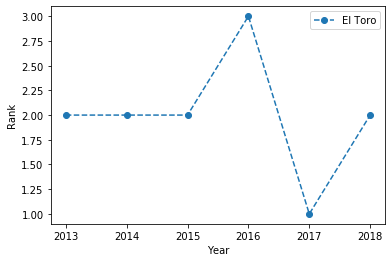

<Figure size 432x288 with 0 Axes>

In [4]:
def plotrankings(coaster, df, park):
    df = df[(df['Name'] == coaster) & (df['Park'] == park)]
    #the above says the dataframe equals inputted coaster name within the column 'Name'
    #and the inputted park name within the column 'Park'. You have built your dataframe
    #when you have these two values because el toro is in two parks, so if this last
    #condition was not added then it would output both parks it was in and output 
    #unhelpful graph.
    x = df['Year of Rank']
    y = df['Rank']
    plt.plot(x, y, linestyle = '--', marker = 'o', label = coaster)
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.legend()
    plt.show()

plotrankings('El Toro', wood, 'Six Flags Great Adventure')
plt.clf()


## Plot two rollercoasters. Below we can see that we need to include the specific park into our code otherwise churns out unhelpful graph

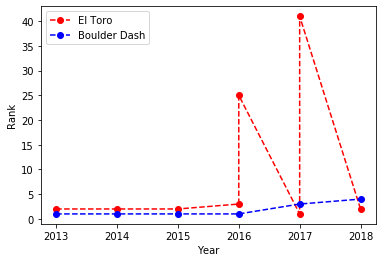

<Figure size 432x288 with 0 Axes>

In [5]:
def plotrankings(coaster1, coaster2, frame):
	frame1 = frame[(frame['Name'] == coaster1)]
	frame2 = frame[(frame['Name'] == coaster2)]
	x1 = frame1['Year of Rank']
	y1 = frame1['Rank']
	x2 = frame2['Year of Rank']
	y2 = frame2['Rank']
	plt.plot(x1, y1, linestyle = '--', color = 'red', marker = 'o', label = coaster1)
	plt.plot(x2, y2, linestyle = '--', color = 'blue', marker = 'o', label = coaster2)
	plt.xlabel('Year')
	plt.ylabel('Rank')
	plt.legend()
	plt.show()


plotrankings('El Toro', 'Boulder Dash', wood)
plt.clf()

## We can code the below easily but we cannot make unique changes like colour etc. 

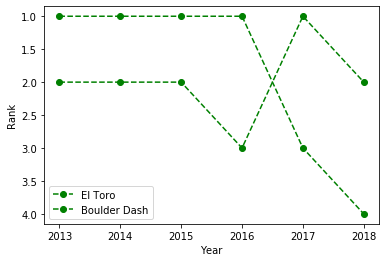

<Figure size 432x288 with 0 Axes>

In [6]:
def plotrankings(coaster, df, park):
    df = df[(df['Name'] == coaster) & (df['Park'] == park)]
    x = df['Year of Rank']
    y = df['Rank']
    plt.plot(x, y, linestyle = '--', marker = 'o', label = coaster, color='green')
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.legend()
    

plotrankings('El Toro', wood, 'Six Flags Great Adventure')
plotrankings('Boulder Dash', wood, 'Lake Compounce')

plt.gca().invert_yaxis() #this inverted_yaxis() code does not work above plotrankings()
plt.show()
plt.clf()

#Now what is the problem with the above code? Well you cannot make specific changes to each
#rollercoaster plotted. If I add the color=green, then both must be green. So there is a way
#we can deal with this...

## So this below is the best way to do the comparison !

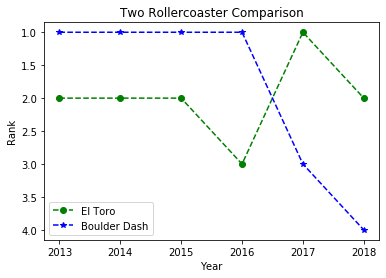

<Figure size 432x288 with 0 Axes>

In [7]:
def plotranking(coaster1, coaster2, park1, park2, df):
    df1 = df[(df['Name'] == coaster1) & (df['Park'] == park1)]
    df2 = df[(df['Name'] == coaster2) & (df['Park'] == park2)]
    x1 = df1['Year of Rank']
    y1 = df1['Rank']
    x2 = df2['Year of Rank']
    y2 = df2['Rank']
    plt.plot(x1, y1, linestyle = '--', marker = 'o', label = coaster1, color='green')
    plt.plot(x1, y2, linestyle = '--', marker = '*', label = coaster2, color='blue')
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.legend()
    plt.title('Two Rollercoaster Comparison')
    
    
plotranking('El Toro', 'Boulder Dash','Six Flags Great Adventure','Lake Compounce',wood)
plt.gca().invert_yaxis() #this inverted_yaxis() code does not work above plotrankings()

plt.show()
plt.clf()


#Now what is the problem with the above code? Well you cannot make specific changes to each
#rollercoaster plotted. If I add the color=green, then both must be green. So there is a way
#we can deal with this...



## 5. Write a function that will plot the ranking of the top n ranked roller coasters over time as lines

     Rank               Name                        Park             Location  \
0       1       Boulder Dash              Lake Compounce       Bristol, Conn.   
1       2            El Toro   Six Flags Great Adventure        Jackson, N.J.   
2       3            Phoenix   Knoebels Amusement Resort        Elysburg, Pa.   
3       4         The Voyage               Holiday World    Santa Claus, Ind.   
4       5        Thunderhead                   Dollywood  Pigeon Forge, Tenn.   
5       6    Ravine Flyer II                   Waldameer            Erie, Pa.   
6       7         Outlaw Run          Silver Dollar City         Branson, Mo.   
7       8          The Beast                Kings Island    Kings Mills, Ohio   
8       9    Lightning Racer                 Hersheypark         Hershey, Pa.   
9      10  Shivering Timbers        Michigan’s Adventure      Muskegon, Mich.   
10      1       Boulder Dash              Lake Compounce       Bristol, Conn.   
11      2            El Toro

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


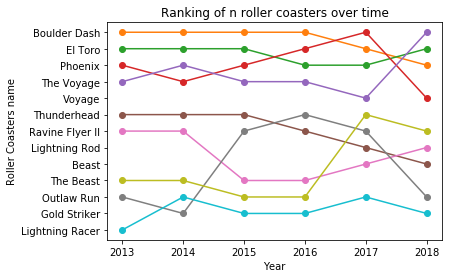

In [8]:
top_n_rankings = wood[wood['Rank'] <= 10]
print(top_n_rankings)

def print_n_ranks(n , top_n_rankings):
    for i in range(n):
    #for i in range(n) means that where n is between 0 and n-1.
        plt.plot(top_n_rankings.loc[top_n_rankings['Rank'] == i]['Year of Rank'],\
         top_n_rankings.loc[top_n_rankings['Rank'] == i]['Name'], marker='o')
    
print_n_ranks(10, top_n_rankings)
plt.xlabel('Year')
plt.ylabel('Roller Coasters name')
plt.title('Ranking of n roller coasters over time')
plt.subplot().invert_yaxis()


plt.show()


## 6. Look at roller_coaster.csv

In [9]:
roller_coasters = pd.read_csv('roller_coasters.csv')

print(roller_coasters.head())
roller_coasters.info()

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
-

## 7. Plot a histogram for any numeric column of the roller_coaster dataframe

Text(0, 0.5, 'frequency')

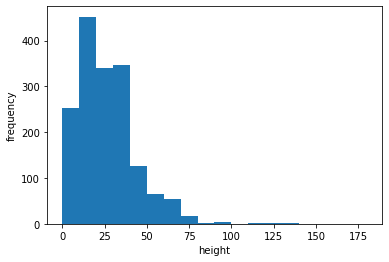

In [10]:
plt.hist(roller_coasters['height'], bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180])
plt.xlabel('height')
plt.ylabel('frequency')

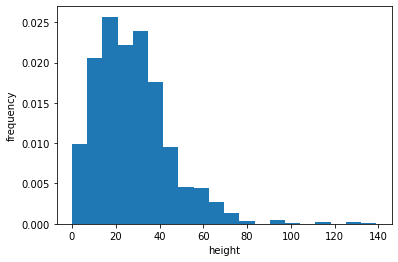

<Figure size 432x288 with 0 Axes>

In [11]:
# This is how someone else answered this question (via GitHub)

def create_a_histogram(name, frame):
	if name == 'height':
		data = frame[frame[name] <= 140]
		data1 = data.dropna(axis = 0, how = 'any')
	else:
		data1 = frame.dropna(axis = 0, how = 'any')
	data_new = data1[name]
	plt.hist(data_new, bins = 20, density = True)
	plt.xlabel(name)
	plt.ylabel('frequency')
	plt.show()

create_a_histogram('height', roller_coasters)
plt.clf()

## 8. Write a function that creates a bar chart showing the number of inversion for each rollercoaster at an amusement park of your choosing

                     name material_type seating_type  speed  height  length  \
435          Blazing Fury         Steel     Sit Down    NaN     NaN     NaN   
436         Sideshow Spin         Steel     Sit Down   23.0     4.0    60.0   
437           Thunderhead        Wooden     Sit Down   89.0    31.0   985.0   
438     Tennessee Tornado         Steel     Sit Down  101.0    50.0   818.0   
766          Mystery Mine         Steel     Sit Down   74.0    35.0   552.0   
1624           Wild Eagle         Steel         Wing   98.0    64.0   953.0   
1767        Lightning Rod        Wooden     Sit Down  118.0    50.0  1158.0   
1924   FireChaser Express         Steel     Sit Down   56.0     NaN   740.0   
1925  Whistle Punk Chaser         Steel     Sit Down    NaN     NaN     NaN   
1926      Thunder Express         Steel     Sit Down   60.0    13.0   716.0   
2356         Dragon Flier            na    Suspended   75.0    19.0   453.0   

      num_inversions manufacturer       park       

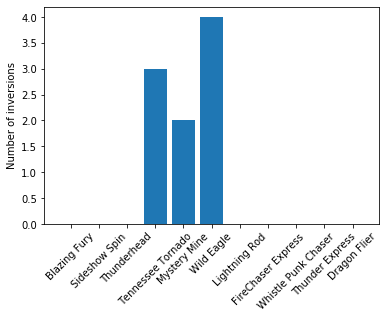

In [12]:
dollywood_coasters = roller_coasters[roller_coasters['park'] == 'Dollywood']
print(dollywood_coasters)

x = dollywood_coasters['name']
y = dollywood_coasters['num_inversions']

plt.bar(x,y)
plt.xticks(rotation=45)
plt.ylabel('Number of inversions')

plt.show()



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


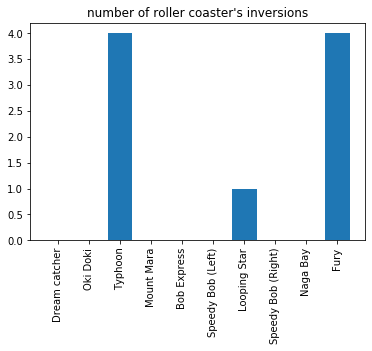

<Figure size 432x288 with 0 Axes>

In [13]:
def create_a_barchart(parkname, frame):
	frame1 = frame[(frame['park'] == parkname)]
    #this does not say this is purely a dataframe that has 'park' names in it. Its the same dataframe excepts 
    #frame1 merely says I want to make a new dataframe that is callable by parkname.
    #Also think about what he has done here... look at your code above... you've done the same thing except gave
    #the function a single park. Look at the code and frame1 and Dollywood_coasters are the same thing.
    #'dollywood_coasters = roller_coasters[roller_coasters['park'] == 'Dollywood']'
	coasters = frame1['name']
    #print(frame1)
    #this dataframe because it's not 'frame1['name'] = 'rollername', with rollername as an example variable, it
    #only says that this dataframe should be a list of id's and coaster names. It is a list of names of all 
    #possible rollercoasters to included in the bar chart.
    
	plt.bar(range(len(coasters)), frame1['num_inversions'])
	plt.title("number of roller coaster's inversions")
	ax = plt.subplot()
	ax.set_xticks(range(len(coasters)))
	ax.set_xticklabels(coasters, rotation = 'vertical')
	plt.show()



create_a_barchart('Bobbejaanland', roller_coasters)
plt.clf()

## It's worth noting in the above you do not even need to establish the dataframe 'coasters' but it is cleaner to do so (see proof below)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


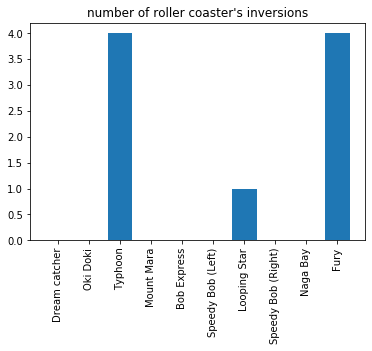

<Figure size 432x288 with 0 Axes>

In [14]:
def create_a_barchart(parkname, frame):
	frame1 = frame[(frame['park'] == parkname)]

	plt.bar(range(len(frame1)), frame1['num_inversions'])
	plt.title("number of roller coaster's inversions")
	ax = plt.subplot()
	ax.set_xticks(range(len(frame1)))
	ax.set_xticklabels(frame1['name'], rotation = 'vertical')
	plt.show()



create_a_barchart('Bobbejaanland', roller_coasters)
plt.clf()

In [15]:
coasters = roller_coasters['name']
print(coasters)

0                                  Goudurix
1                             Dream catcher
2                                Alucinakis
3                                  Anaconda
4                                    Azteka
                       ...                 
2797                       Dragon Challenge
2798                             Wild Mouse
2799    Unnamed Atlantica Supersplash Clone
2800        Unknown Duelling Launch Coaster
2801                          Black Diamond
Name: name, Length: 2802, dtype: object


In [16]:
print(roller_coasters['status'].unique())

['status.operating' 'status.relocated' 'status.closed.definitely'
 'status.retracked' 'status.closed.temporarily' 'status.unknown'
 'status.construction' 'status.announced' 'status.rumored']


## 9. Write a function that creates a pie chart that compares the number of operating roller coasters ('status.operating') to the number of closed roller coasters ('status.closed.definitely')

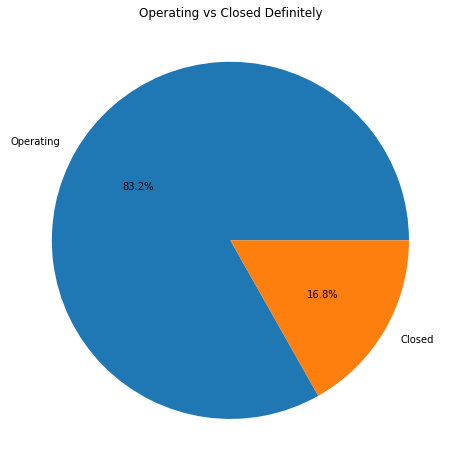

In [17]:
def status_pie(df, status_check1, status_check2):
    frame1 = df[df['status'] == status_check1]
    frame2 = df[df['status'] == status_check2]
    pie_chart =[len(frame1),len(frame2)]
    plt.figure(figsize=(8,8))
    plt.axis('equal')
    plt.title('Operating vs Closed Definitely')
    plt.pie(pie_chart,autopct='%0.1f%%',labels =['Operating','Closed'])

status_pie(roller_coasters,'status.operating','status.closed.definitely')

plt.show()

## 10. Write a function that creates a scatter plot of two numeric columns

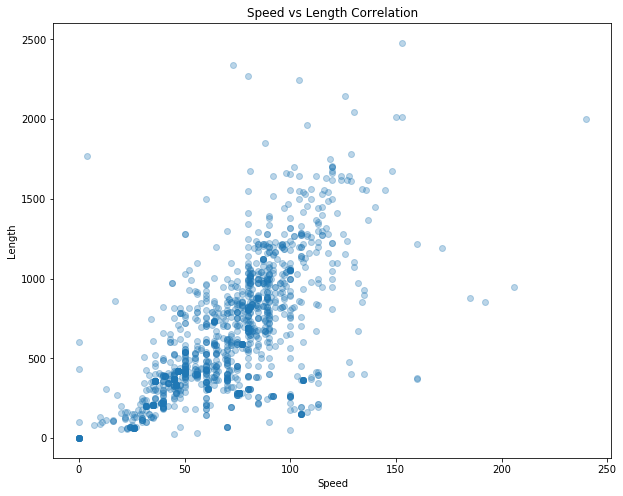

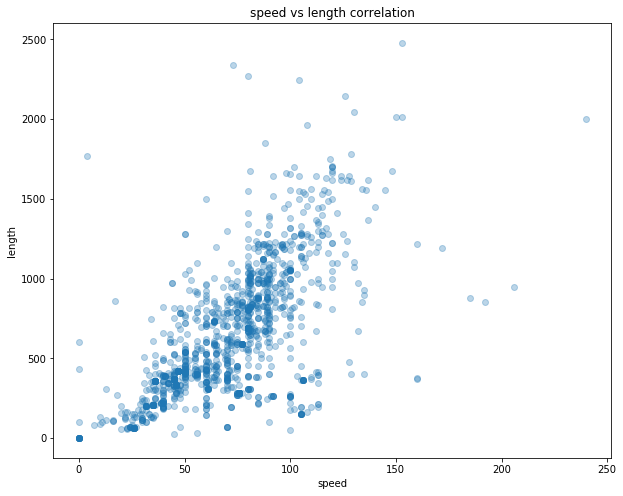

In [18]:
# the below gets you to the scatter graph BUT it's inefficient.
# At no point is 'speedframe' or 'lengthframe' called...
# Also the variables speedy and lengthy are for inputting minimum integers
# only and not for inputting other columns to compare against one another
# like'height' and 'num_inversions'.

def scatter_graph(df, speedy, lengthy):
    speedframe = df[df['speed'] >= speedy]
    lengthframe = df[df['length'] >= lengthy]
    plt.figure(figsize=(10,8))
    plt.xlabel('Speed')
    plt.ylabel('Length')
    plt.title('Speed vs Length Correlation')
    plt.scatter(df['speed'],df['length'], alpha= 0.3)
    
    
scatter_graph(roller_coasters, 0, 0)
plt.show()

# So this below is a lot better and streamlined..!


def scatter_graph(df, col1, col2):
    plt.figure(figsize=(10,8))
    plt.scatter(df[col1],df[col2], alpha= 0.3)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(str(col1) + ' vs ' + str(col2) + ' correlation')
    
scatter_graph(roller_coasters, 'speed', 'length')
plt.show() 


## A neater way would be this...

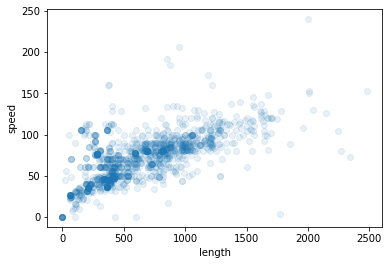

<Figure size 432x288 with 0 Axes>

In [19]:
def create_a_scatter(col1, col2, frame):
	plt.scatter(frame[col1], frame[col2], alpha = 0.1)
    #Using alpha like a heat map..
	plt.xlabel(col1)
	plt.ylabel(col2)
	plt.show()	

create_a_scatter('length', 'speed', roller_coasters)
plt.clf()